# Movie Recommendation System
It is a system that predicts of filter preferences according to the User choices.<br>

__There are two ways to implement Recommendation systems__
- Content Based Filtering- This approach uses a series of discrete Characteristics of an item in order to recommend additional items with similar Proprties.It recommends items based on user’s past preferences.
- Collaborartive Filtering - This approach build a model from user's past behaviour.This model is then used to predict items (or ratings for items) that user may have an interest in.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df1 = pd.read_csv("../datasets/collaborative/ratings.csv")

In [9]:
df1.head(n=5)

,user_id,movie_id,rating,timestamp
0,172,94969,5.0,1396067836
1,172,98956,4.0,1396067879
2,176,73881,4.0,1499807147
3,221,1900,4.5,1288550866
4,333,33688,4.0,1412015122


In [17]:
print(df1.user_id.nunique())
print(df1.movie_id.nunique())

5667
779


In [21]:
df2 = pd.read_csv("../datasets/collaborative/titles.csv")

In [37]:
df2.head(n=5)


,movie_id,title
0,139,Target (1995)
1,568,Bhaji on the Beach (1993)
2,1900,Children of Heaven The (Bacheha-Ye Aseman) (1...
3,2284,Bandit Queen (1994)
4,5985,Asoka (Ashoka the Great) (2001)


In [38]:
df=pd.merge(df1,df2,on='movie_id')
df.tail()

,user_id,movie_id,rating,timestamp,title
17599,263047,176249,3.5,1501626732,Mom (2017)
17600,272748,176249,3.5,1501737788,Mom (2017)
17601,271060,192515,4.5,1534314400,Ramaiya Vastavaiya (2013)
17602,271113,186637,2.0,1523282838,Bobby Jasoos (2014)
17603,280887,164443,1.0,1481292995,Freaky Ali (2016)


In [42]:
df.groupby('title').mean().sort_values(by='rating',ascending=False)

,user_id,movie_id,rating,timestamp
title,,,,
Shor in the City (2011),190096.0,154154.0,5.00,1.456633e+09
Humpty Sharma Ki Dulhania (2014),75929.0,184195.0,5.00,1.519425e+09
Hooligan (1998),98197.0,137593.0,5.00,1.459317e+09
Samay: When Time Strikes (2003),190096.0,134346.0,5.00,1.433036e+09
Death of a Doctor (1991),152808.0,141201.0,4.75,1.441599e+09
...,...,...,...,...
The Train: Some Lines Shoulder Never Be Crossed... (2007),163640.0,153774.0,0.50,1.456380e+09
Ghost (2012),190096.0,154170.0,0.50,1.456639e+09
Hawa (2003),190096.0,152826.0,0.50,1.455703e+09


# Exploratory Data Analysis

In [54]:
df.groupby('title').count()['rating'].sort_values(ascending=False)

title
3 Idiots (2009)                                       1394
Children of Heaven  The (Bacheha-Ye Aseman) (1997)     900
Namesake  The (2006)                                   581
Bhaji on the Beach (1993)                              396
PK (2014)                                              392
                                                      ... 
Hum To Mohabbat Karega (2000)                            1
Householder  The (Gharbar) (1963)                        1
Hotel Salvation (2016)                                   1
Holi (1985)                                              1
100 Days (1991)                                          1
Name: rating, Length: 779, dtype: int64

In [62]:
rating = pd.DataFrame(df.groupby('title')['rating'].mean().sort_values(ascending=False))

In [73]:
rating['no of ratings']=df.groupby('title').count()['rating'].sort_values(ascending=False)
rating=rating.sort_values(by='no of ratings',ascending=False)

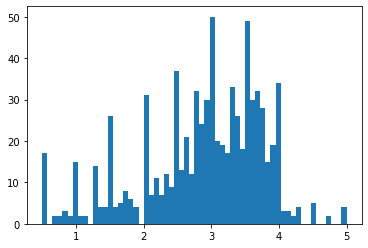

In [76]:
plt.hist(rating['rating'],bins=60)
plt.show()

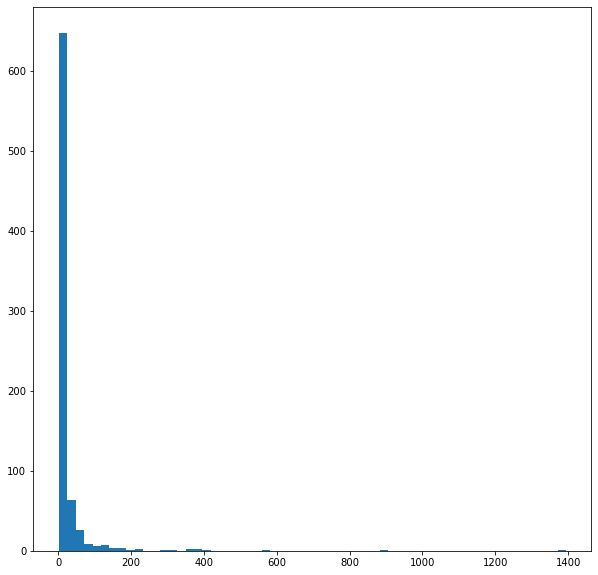

In [78]:
plt.figure(figsize=(10,10))
plt.hist(rating['no of ratings'],bins=60)
plt.show()

In [79]:
df

,user_id,movie_id,rating,timestamp,title
0,172,94969,5.0,1396067836,Kahaani (2012)
1,2419,94969,3.0,1365538405,Kahaani (2012)
2,9168,94969,1.0,1479004366,Kahaani (2012)
3,9303,94969,3.0,1432045238,Kahaani (2012)
4,9535,94969,4.0,1436160506,Kahaani (2012)
...,...,...,...,...,...
17599,263047,176249,3.5,1501626732,Mom (2017)
17600,272748,176249,3.5,1501737788,Mom (2017)
17601,271060,192515,4.5,1534314400,Ramaiya Vastavaiya (2013)
17602,271113,186637,2.0,1523282838,Bobby Jasoos (2014)


In [82]:
movie_matrix = pd.pivot_table(df,index='user_id',columns='title',values='rating')

In [88]:
three_idiot_user_rating = movie_matrix['3 Idiots (2009)']

In [91]:
three_idiot_user_rating

user_id
172       NaN
176       4.0
221       NaN
333       NaN
339       NaN
         ... 
283116    NaN
283147    NaN
283175    NaN
283188    NaN
283195    NaN
Name: 3 Idiots (2009), Length: 5667, dtype: float64

In [94]:
similar_three_idiot=movie_matrix.corrwith(three_idiot_user_rating)
similar_three_idiot

title
100 Days (1991)                         NaN
1920 (2008)                        0.397467
1920: Evil Returns (2012)          1.000000
1942: A Love Story (1994)         -0.727607
2 States (2014)                    0.466137
                                     ...   
Zeher (2005)                       1.000000
Zid (2014)                              NaN
Zindagi Na Milegi Dobara (2011)    0.463296
Zokkomon (2011)                         NaN
road (2002)                             NaN
Length: 779, dtype: float64

In [116]:
corr_three_idiot=pd.DataFrame(similar_three_idiot,columns=['Correlation'])

In [117]:
corr_three_idiot.sort_values(by='Correlation',ascending=False)

,Correlation
title,
Corporate (2006),1.0
Delhi Safari (2012),1.0
Army (1996),1.0
Dil Ne Jise Apna Kahaa (2004),1.0
Naina (2005),1.0
...,...
Yeh Raaste Hain Pyaar Ke (2001),NaN
Youngistaan (2014),NaN
Zid (2014),NaN


In [118]:
corr_three_idiot=corr_three_idiot.join(rating['no of ratings'])

In [119]:
corr_three_idiot

,Correlation,no of ratings
title,,
100 Days (1991),NaN,1
1920 (2008),0.397467,10
1920: Evil Returns (2012),1.000000,5
1942: A Love Story (1994),-0.727607,5
2 States (2014),0.466137,16
...,...,...
Zeher (2005),1.000000,2
Zid (2014),NaN,2
Zindagi Na Milegi Dobara (2011),0.463296,136


In [121]:
corr_three_idiot[corr_three_idiot['no of ratings']>70].sort_values(by='no of ratings',ascending=False)

,Correlation,no of ratings
title,,
3 Idiots (2009),1.000000,1394
Children of Heaven The (Bacheha-Ye Aseman) (1997),0.623709,900
Namesake The (2006),0.175230,581
Bhaji on the Beach (1993),0.374634,396
PK (2014),0.597903,392
Bandit Queen (1994),0.175047,385
Salaam Bombay! (1988),0.686886,362
The Lunchbox (2013),0.582370,352
Like Stars on Earth (Taare Zameen Par) (2007),0.620395,316
